In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/data.csv')

# "Commute_Time" 열만 추출해 Series로 만듦
commute_before = df['commute_before']
commute_after = df['commute_after']


# 기초 통계량 확인
print(f"도입 전 평균 통근 시간: {np.mean(commute_before):.2f}분")
print(f"도입 후 평균 통근 시간: {np.mean(commute_after):.2f}분")

도입 전 평균 통근 시간: 37.06분
도입 후 평균 통근 시간: 33.39분


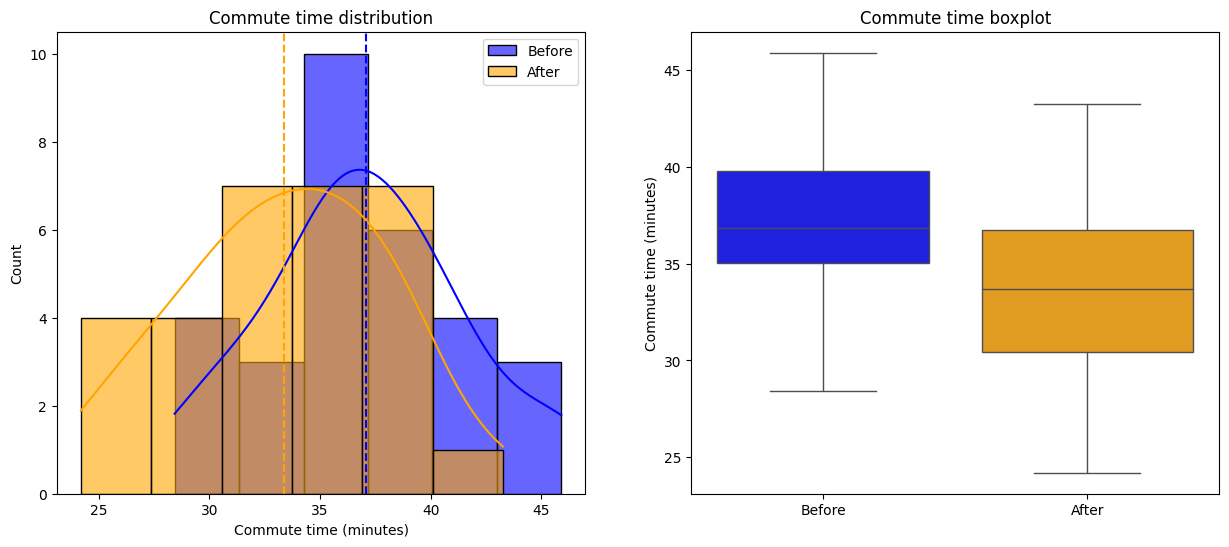

In [2]:
plt.figure(figsize=(15, 6))
# 그래프 크기 설정

# KDE 그래프: 통근 시간 분포 비교
plt.subplot(1, 2, 1)
# 서브플롯 설정 (행 개수, 열 개수, 현재 위치)

sns.histplot(commute_before, kde=True, color='blue', label='Before', alpha=0.6)  
# KDE 포함 여부 설정

sns.histplot(commute_after, kde=True, color='orange', label='After', alpha=0.6)  

plt.axvline(np.mean(commute_before), color='blue', linestyle='dashed')  
# 도입 전 평균선 추가

plt.axvline(np.mean(commute_after), color='orange', linestyle='dashed')  
# 도입 후 평균선 추가

plt.title('Commute time distribution')  
plt.xlabel('Commute time (minutes)')  
plt.legend()

# 박스플롯: 그룹 간 비교
plt.subplot(1, 2, 2)

sns.boxplot(data=[commute_before, commute_after], palette=['blue', 'orange'])  
# 데이터 리스트를 입력하여 박스플롯 생성

plt.xticks([0, 1], ['Before', 'After'])  
plt.title('Commute time boxplot')  
plt.ylabel('Commute time (minutes)')

plt.show()

In [3]:
shapiro_before = stats.shapiro(commute_before)  
# 정규성 검정 함수

shapiro_after = stats.shapiro(commute_after)  

print(f"Shapiro-Wilk 검정 (도입 전) p-value: {shapiro_before.pvalue:.4f}")  
print(f"Shapiro-Wilk 검정 (도입 후) p-value: {shapiro_after.pvalue:.4f}")  

Shapiro-Wilk 검정 (도입 전) p-value: 0.6868
Shapiro-Wilk 검정 (도입 후) p-value: 0.9130


In [ ]:
# Shapiro-Wilk 검정결과 p값이 0.05보다 크므로 정규성을 만족한다고 할 수 있음

In [ ]:
# 등분산 검정 -> 등분산 가정 가능
statistic, p_value = stats.levene(commute_before, commute_after)

print(f"Levene's test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Levene's test statistic: 0.2452
p-value: 0.6223


In [5]:
t_stat, p_value = stats.ttest_ind(commute_before, commute_after, equal_var=True)  
# 독립 표본 t-검정 수행, equal_var 여부 입력

print(f"t-통계량: {t_stat:.4f}")  
print(f"p-value: {p_value:.4f}")  

t-통계량: 3.1004
p-value: 0.0030


In [ ]:
# 유의수준 0.05하에서 p값이 0.05보다 작으므로 귀무가설을 기각함, 
# 즉  commute_before와 commute_after는 유의미한 차이가 있음을 알 수 있음